In [55]:
import numpy as np
import matplotlib.pyplot as plt


def potential(x,t):
    r = np.linalg.norm(x)
    return 1/2 * r**2

def force(x,t):
    return -x


def D_time(t):
    global D_0
    return D_0

def D_space(x):
    global D_0
    return D_0

def velocity(x, t):
    r = np.linalg.norm(x)
    vr = force(r, t) + np.sqrt(2 * D_time(t)) * np.random.normal(size=r.shape)
    theta = np.arctan2(x[1], x[0])
    vtheta = np.sqrt(2 * D_time(t)) * np.random.normal(size=theta.shape)
    vx = vr * np.cos(theta) - vtheta * np.sin(theta)
    vy = vr * np.sin(theta) + vtheta * np.cos(theta)

    return np.array([vx, vy])

def velocity2(x, t):
    vx = force(x, t)[0] + np.sqrt(2 * D_time(t)) * np.random.normal()
    vy = force(x, t)[1] + np.sqrt(2 * D_time(t)) * np.random.normal()
    return np.array([vx, vy])

def integrate(vec0, t0, t, steps):
    dt = (t[1] - t0) 
    vec = np.zeros((len(vec0), len(t)))
    vec[:,0] = vec0
    for i in range(0, len(t)-1):
        x = vec[0:2,i]
        v = velocity2(x, t[i])
        vec[0:2,i+1] = vec[0:2,i] + v * dt
        vec[2:4,i+1] = v
    return vec

vec0 = np.array([1,1,10,10])

D_0 = 1
t0 = 0.0
tn = 100.0
steps = 1000

t = np.linspace(t0, tn, steps+1)
paths = []

for i in range(1): 
    paths.append(integrate(vec0, t0, t, steps))


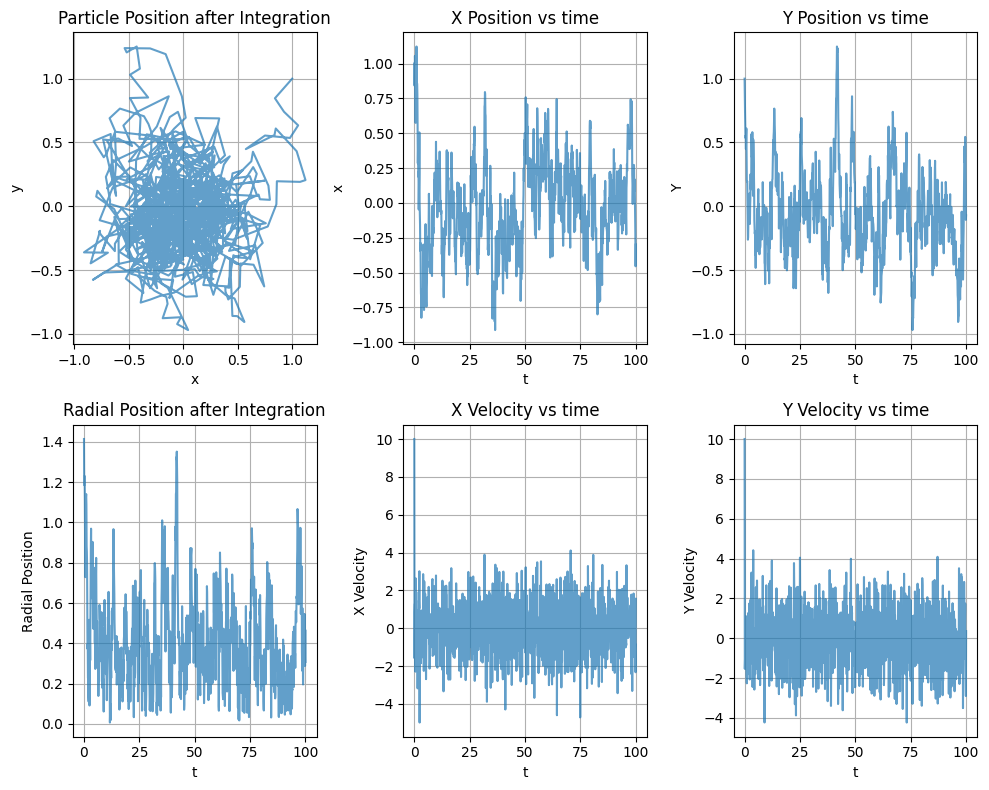

In [56]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# Plot 1: Particle Position after Integration
axs[0, 0].set_title('Particle Position after Integration')
for path in paths:
    axs[0, 0].plot(path[0, :], path[1, :], alpha=0.7)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].grid()

axs[0, 1].set_title('X Position vs time')
for path in paths:
    axs[0, 1].plot(t, path[0, :], alpha=0.7)
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('x')
axs[0, 1].grid()

axs[0, 2].set_title('Y Position vs time')
for path in paths:
    axs[0, 2].plot(t, path[1, :], alpha=0.7)
axs[0, 2].set_xlabel('t')
axs[0, 2].set_ylabel('Y')
axs[0, 2].grid()

axs[1, 0].set_title('Radial Position after Integration')
for path in paths:
    axs[1, 0].plot(t, np.linalg.norm(path[:2, :], axis=0), alpha=0.7)
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('Radial Position')
axs[1, 0].grid()

axs[1, 1].set_title('X Velocity vs time')
for path in paths:
    axs[1, 1].plot(t, path[2, :], alpha=0.7)
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('X Velocity')
axs[1, 1].grid()

axs[1, 2].set_title('Y Velocity vs time')
for path in paths:
    axs[1, 2].plot(t, path[3, :], alpha=0.7)
axs[1, 2].set_xlabel('t')
axs[1, 2].set_ylabel('Y Velocity')
axs[1, 2].grid()

# Adjust layout and show
plt.tight_layout()
plt.show()